<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initialization-cell----run-this-first!" data-toc-modified-id="Initialization-cell----run-this-first!-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialization cell -- run this first!</a></span></li><li><span><a href="#Fitting-scalar-valued-functions-with-a-neural-network" data-toc-modified-id="Fitting-scalar-valued-functions-with-a-neural-network-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fitting scalar-valued functions with a neural network</a></span><ul class="toc-item"><li><span><a href="#Modeling-the-input-output-relation" data-toc-modified-id="Modeling-the-input-output-relation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Modeling the input-output relation</a></span></li><li><span><a href="#The-mean-squared-error-loss-function-and-its-gradient" data-toc-modified-id="The-mean-squared-error-loss-function-and-its-gradient-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>The mean-squared error loss function and its gradient</a></span></li><li><span><a href="#Using-the-network-to-learn-a-univariate,-scalar-valued-function" data-toc-modified-id="Using-the-network-to-learn-a-univariate,-scalar-valued-function-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Using the network to learn a univariate, scalar-valued function</a></span></li><li><span><a href="#Understanding-how-a-neural-network-tells-apart-data-from-two-categories" data-toc-modified-id="Understanding-how-a-neural-network-tells-apart-data-from-two-categories-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Understanding how a neural network tells apart data from two categories</a></span></li><li><span><a href="#Linear-separability-of-two-classes" data-toc-modified-id="Linear-separability-of-two-classes-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Linear separability of two classes</a></span></li><li><span><a href="#Separating-linearly-non-separable-classes-with-a-neural-network" data-toc-modified-id="Separating-linearly-non-separable-classes-with-a-neural-network-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Separating linearly non-separable classes with a neural network</a></span></li></ul></li><li><span><a href="#The-code-in-the-next-cell-generates-samples-for-Class-1-and-Class-2-and-plots-them-on-the-2-D-plane." data-toc-modified-id="The-code-in-the-next-cell-generates-samples-for-Class-1-and-Class-2-and-plots-them-on-the-2-D-plane.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The code in the next cell generates samples for Class 1 and Class 2 and plots them on the 2-D plane.</a></span></li><li><span><a href="#Fitting-vector-valued-multivariate-functions" data-toc-modified-id="Fitting-vector-valued-multivariate-functions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Fitting vector-valued multivariate functions</a></span><ul class="toc-item"><li><span><a href="#Application:-Handwriting-recognition-of-more-than-2-digits-at-a-time" data-toc-modified-id="Application:-Handwriting-recognition-of-more-than-2-digits-at-a-time-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Application: Handwriting recognition of more than 2 digits at a time</a></span></li><li><span><a href="#Recognizing-your-handwriting" data-toc-modified-id="Recognizing-your-handwriting-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Recognizing <em>your</em> handwriting</a></span></li></ul></li><li><span><a href="#Summary-and-next-steps" data-toc-modified-id="Summary-and-next-steps-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary and next steps</a></span></li><li><span><a href="#Additional-Exercises" data-toc-modified-id="Additional-Exercises-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Additional Exercises</a></span><ul class="toc-item"><li><span><a href="#Accuracy-versus-number-of-classes" data-toc-modified-id="Accuracy-versus-number-of-classes-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Accuracy versus number of classes</a></span></li><li><span><a href="#Accuracy-as-a-function-of-the-learning-rate" data-toc-modified-id="Accuracy-as-a-function-of-the-learning-rate-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Accuracy as a function of the learning rate</a></span></li><li><span><a href="#Confusion-matrix" data-toc-modified-id="Confusion-matrix-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Confusion matrix</a></span></li><li><span><a href="#Understanding-why-the-algorithm-can-fail" data-toc-modified-id="Understanding-why-the-algorithm-can-fail-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Understanding why the algorithm can fail</a></span></li><li><span><a href="#Equivalent-formulation-of-nearest-vector-(in-least-squares-sense)" data-toc-modified-id="Equivalent-formulation-of-nearest-vector-(in-least-squares-sense)-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Equivalent formulation of nearest vector (in least squares sense)</a></span></li><li><span><a href="#Fitting-a-function" data-toc-modified-id="Fitting-a-function-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Fitting a function</a></span></li></ul></li></ul></div>

# Initialization cell -- run this first!

In [1]:
using Plots, Interact, LinearAlgebra
using Random: randperm
using Statistics: mean

gr(
    markerstrokecolor="white", 
    markerstrokewidth=0,
    alpha=0.6,
    label=""
)

function heatmap_digit(x::Matrix; kwargs...)
    return heatmap(x; transpose=true, yflip=true, showaxis=:false, grid=:false, color=:grays, aspect_ratio=1.0, kwargs...)
end

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1186
┌ Info: Precompiling Interact [c601a237-2ae4-5e1e-952c-7a85b0c7eef1]
└ @ Base loading.jl:1186


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-8764628573021021045\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-2552534990259499987\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-8764628573021021045\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

heatmap_digit (generic function with 1 method)

# Fitting scalar-valued functions with a neural network

We have seen previously how neural networks can learn a scalar-valued function, as well as a multivariate function (when we trained a network to distinguish between two digits).

Our goal in this chapter is to get a deeper understanding and appreciation of the power of nonlinear activation functions. Soon you will know how to train a more general network, with an artbirary number of input neurons, and an arbitrary number of neurons in a so-called *hidden layer*. The *output layer* for this network will either have one neuron, or the same number of neurons as the hidden layer.

We will use this network to:

- learn univariate and multivariate scalar valued functions

- revisit how to discriminate between two classes, demonstrating what a `tanh` network is able to do that a `linear` network cannot

- learn how to distinguish more than two classes at once

- learn to recognize all 10 digits (0-9) in your handwriting!

Let's get started!

## Modeling the input-output relation

We begin with a network that can (we hope) learn a multivariate scalar valued function.

Let us take a look at a new network structure:

<img src="singleclass_neuron.png" alt="Drawing" style="width: 500px;"/>

This network has $d$ inputs (or input neurons) corresponding to the inputs $x_1, \ldots, x_d$, one hidden layer consisting of $n$ neurons, and an output layer consisting of a single output neuron. The figure above shows such a network with $d = 4$ and $n = 5$. 

Let $w_{ij}$ denote the weight of the edge from the input neuron $j$ to the neuron $i$ in the hidden layer, and let $b_1, \ldots, b_n$ denote the respective biases. The output of the first neuron in the hidden layer is given by

\begin{equation}
g_{\color{blue}{1}}(x) = f_{\rm a}(w_{\color{blue}{1}1} x_1 + w_{\color{blue}{1} 2} x_2 + \ldots + w_{\color{blue}{1} d} x_d + b_{\color{blue}{1}}).
\end{equation}

Similarly, the output of the second neuron in the hidden layer is given by

\begin{equation}
g_{\color{blue}{2}}(x) = f_{\rm a}(w_{\color{blue}{2}1} x_1 + w_{\color{blue}{2} 2} x_2 + \ldots + w_{\color{blue}{2} d} x_d + b_{\color{blue}{2}}).
\end{equation}

And for the $i$-th neuron, we have

\begin{equation}
g_{\color{blue}{i}}(x) = f_{\rm a}(w_{\color{blue}{i}1} x_1 + w_{\color{blue}{i} 2} x_2 + \ldots + w_{\color{blue}{i} d} x_d + b_{\color{blue}{i}}).
\end{equation}

The output of the neural network overall is given by

\begin{equation}
g(x) = \sum_{i=1}^n g_i(x)
\end{equation}

Let's begin rewriting the above expression using matrix-vector notation. If we define $x$ to be the vector of inputs

$$ x = \begin{bmatrix} x_1 & \ldots & x_{d} \end{bmatrix}^{T},$$

which is equivalent to the expression  

\begin{equation}
g(x) = \sum_{i=1}^{n} f_{\rm a}\left(\sum_{j=1}^{d} w_{ij} x_j + b_i\right),
\end{equation}
where $f_{\rm a}$ is the activation function.

Let us rewrite this expression via a matrix-vector product and the "dot" operator.

Define the $n \times d$ matrix

$$W = \begin{bmatrix} w_{11} & \ldots & w_{1d}  \\
                      w_{21} & \ldots & w_{2d} \\
                      \vdots & \vdots & \vdots \\
                      w_{n1} & \ldots & w_{nd} \end{bmatrix}.$$
                      
(Keep in mind that $n$ is the number of neurons in the hidden layer, and $d$ is the number of inputs.) Then for the vector of biases

$$ b = \begin{bmatrix} b_1 & \ldots & b_{n} \end{bmatrix}^{T},$$

we have

\begin{equation}
\begin{bmatrix} g_{1}(x) \\ g_{2}(x) \\ \vdots \\ g_{n}(x) \end{bmatrix} =  f_{\rm a}.(W x + b).
\end{equation}


So we can express the output of the neural network as

\begin{equation}
g(x) = \textrm{sum}\left( f_{\rm a}.(W x + b) \right).
\end{equation}

**Exercise**:

Write a Julia function `g` which takes as an input a $d \times N$ matrix `X`, the $n \times d$ matrix `W`, the $n$ dimensional vector `b`, and the activation function `f_a`, and returns the $1 \times N$ matrix of outputs `Y`. The variables `X` and `W` have  type `Array{Float64,2}`. The variable `b` has type `Array{Float64,1}`. The output should have type `Array{Float64,2}`.

In [2]:
"""
    Y = g(X, W, b, f_a)

Inputs:
* `X` is a d x N Array{Float64,2} -- even when n or d equal 1
* `W` is an n x d Array{Float64,2} 
* `b` is n element Array{Float64,1}

Output: `Y`, the 1 x N matrix of outputs
"""
function g(X::Array, W::Matrix, b::Vector, f_a::Function)
    return sum(f_a.(W * X .+ b); dims=1) # type Array{Float64,2}
end

g

## The mean-squared error loss function and its gradient

Our goal now is to learn an optimal weight matrix $W$ and bias vector $b$.

We are given $N$ (scalar-valued) training samples $y_1, \ldots y_N$. Our goal is to learn the weights and the biases by minimizing the loss on the training samples. We will, as before, select the mean-squared error for our loss function. For this network, the loss is given by

\begin{equation}\label{eq:loss}
L(x,y,W,b)  = \dfrac{1}{N} \sum_{k=1}^{N} \left(y_k - \sum_{i=1}^{n} g_i(x^{(k)})\right)^2,
\end{equation}

where $x^{(k)}$ denotes the $k$-th training input -- the $k$-th column of the matrix of training inputs. This can be rewritten as 

$$L(x,y,W,b) = \dfrac{1}{N} \sum_{k=1}^{N} \left[ y_k -  \sum_{i=1}^{n}f\left(\sum_{j=1}^{d} w_{ij} x_j^{(k)} + b_i\right) \right]^2.$$

We are interested in values for the elements of the weight matrix and the bias vector for which their respective gradients vanish. After taking some derivatives, we can represent the gradients analytically:

$$\nabla_{w_{pq}} L(x,y,W,b) = -\dfrac{2}{N}\sum_{k=1}^{N} \left[ y_k - \sum_{i=1}^{n} f\left( \sum_{j=1}^{d} w_{ij} x_{j}^{(k)} +  b_i\right) \right] f'\left(\sum_{j=1}^{d} w_{pj} x_{j}^{(k)} + b_p\right) x_{q}^{(k)},$$

and 

$$\nabla_{b_p} L(x,y,W,b) = -\dfrac{2}{N} \sum_{k=1}^{N} \left[ y_k - \sum_{i=1}^{n} f\left( \sum_{j=1}^{d} w_{ij} x_{j}^{(k)} +  b_i\right) \right] f'\left(\sum_{j=1}^{d} w_{pj} x_{j}^{(k)} + b_p\right).$$

Here $p = 1, \ldots, n$ and $q = 1, \ldots d$. 

**Exercise**:

Implement the function `grad_loss_1layer_1output` which takes as its input the matrix of input training data `x`, the matrix of output training values `y`, the weight matrix `W`, the bias vector `b`, the activation function `f_a`, and the activation function derivative `df_a`, and returns a `Tuple` `(dW, db, loss)` corresponding to the matrix of weight derivatives, the vector of bias derivatives, and the loss.

In [3]:
"""
    dW, db, loss = grad_loss_1layer_1output(f_a, df_a, x, y, W, b)

Inputs:
* `x` is a d x N Array{Float64,2} -- even when d= 1
* `y` is a 1 x N element Array{Float64,2}
* `W` is an n x d Array{Float64,2} 
* `b` is n element Array{Float64,1}

Outputs:
* `dW`: vector of gradients with respect to weights
* `db`: gradient with respect to bias
* `loss`: loss function value
"""
function grad_loss_1layer_1output(
        f_a::Function,
        df_a::Function,
        x::Matrix,
        y::Matrix,
        W::Matrix,
        b::Vector
        )          
    
    n, d = size(W) 
    N = size(x, 2)
    
    dW = zeros(n, d)
    db = zeros(n)
    loss = 0.0
    
    for k in 1 : N
        error = (y[k] - sum(f_a.(W * x[:, k] + b)))
        for p in 1 : n
            for q in 1 : d
                # TODO: Fill in the ??
                dW[p, q] = dW[p, q] - 2 / N * error * df_a(W[p, :]' * x[: ,k] + b[p]) * x[q, k]
            end
            #TODO: Fill in the ??
            db[p] = db[p] - 2 / N * error * df_a(W[p, :]' * x[:, k] + b[p])
        end
        
        ## TODO: Fill in the ??
        loss =  loss + 1/N * error^2
    end
    return dW, db, loss
end

grad_loss_1layer_1output

We will use the stochastic gradient descent method.

In [4]:
"""
    W, b, loss = learn2classify_sgd_1layer(f_a, df_a, grad_loss, x, y, W0, b0,
        mu=1e-3, iters=500, batch_size=10)

Inputs:
* `x` is a d x N Array{Float64,2} -- even when = 1
* `y` is a 1 x N element Array{Float64,2}
* `W0` is an n x d Array{Float64,2} 
* `b0` is n element Array{Float64,1}

Outputs:
* `W`: matrix of weights
* `b`: bias
* `loss`: loss function value
"""
function learn2classify_sgd_1layer(
        f_a::Function,
        df_a::Function,
        grad_loss::Function,
        x::Matrix,
        y::Matrix,
        W0::Matrix,
        b0::Vector,
        mu::Number=1e-3,
        iters::Integer=500,
        batch_size::Integer=10
    )
    
    n, d = size(W0) #number of inputs
    N = size(x, 2) # number of training samples
 
    W = W0
    b = b0
    
    loss = zeros(iters)
    for i in 1:iters
        batch_idx = randperm(N)
        batch_idx = batch_idx[1:min(batch_size, N)]
        
        dW, db, loss_i = grad_loss(f_a, df_a, x[:, batch_idx], y[:, batch_idx], W, b)
        
        W = W - mu * dW
        b = b - mu * db

        loss[i] = loss_i
    end
    return W, b, loss
end

learn2classify_sgd_1layer

And also the accelerated stochastic gradient descent method.

In [5]:
function learn2classify_asgd_1layer(
        f_a::Function, 
        df_a::Function, 
        grad_loss::Function,
        x::Matrix, 
        y::Matrix, 
        W0::Matrix, 
        b0::Vector,
        mu::Number=1e-3, 
        iters::Integer=500, 
        batch_size::Integer=10
    )

    d = size(W0, 2) #number of inputs
    n = size(W0, 1) # number of neurons
    N = size(x, 2) # number of training samples
 
    W = W0
    b = b0
    
    loss = zeros(iters)

    lambdak = 0
    qk = W
    pk = b
    for i in 1:iters
        batch_idx = randperm(N)
        batch_idx = batch_idx[1:min(batch_size, N)]
        
        dW, db, loss_i = grad_loss(f_a, df_a, x[:, batch_idx], y[:, batch_idx], W, b)
        
        qkp1 = W - mu * dW
        pkp1 = b - mu * db

        lambdakp1 = (1 + sqrt(1 + 4 * lambdak^2)) / 2
        gammak = (1 - lambdak) / lambdakp1

        W = (1 - gammak) * qkp1 + gammak * qk
        b = (1 - gammak) * pkp1 + gammak * pk

        qk = qkp1
        pk = pkp1
        lambdak = lambdakp1

        loss[i] = loss_i
    end
    return W, b, loss
end

learn2classify_asgd_1layer (generic function with 4 methods)

Complete the function `dtanh` in the next cell. The function `dtanh(z)` returns the derivative of the `tanh(z)`.

In [6]:
function dtanh(z)
    return 1 - tanh(z)^2 ##TODO: fill ??
end

dtanh (generic function with 1 method)

We define the $\textrm{linear}$ activation function in the next cell. 

In [7]:
"Linear function"
linear(z) = z

linear

Complete the function `dlinear` in the next cell.

In [8]:
"Derivative of linear function"
function dlinear(z) 
     return 1  ##TODO: fill in ??
end

dlinear

## Using the network to learn a univariate, scalar-valued function

Let us now try to learn the function

$$f(x) = x^2 \textrm{ for } x \in [-1,1].$$

The following cell generates training points $x_1, \ldots, x_N$, and the points $y_1, \ldots, y_N$, where $y_i = x_i^2$.

In [9]:
N = 200
x = Matrix(collect(range(-1; stop=1, length=N))')
y = x.^2

1×200 Array{Float64,2}:
 1.0  0.980001  0.960203  0.940608  …  0.940608  0.960203  0.980001  1.0

We initialize the parameters in the next cell, then learn them using stochastic gradient descent.

In [10]:
f_a, df_a = tanh, dtanh
n, d = 8, 1
iters, batch_size = 5000, 20
W0, b0  = randn(n, d), randn(n)

([0.431265; 1.68672; … ; -0.681575; -0.608747], [1.24163, -0.038042, -0.557354, -1.10251, -1.6066, -0.561991, 2.36332, -0.077811])

We now train the network -- note that selection of the learning rate is the most important part of whether the network learns or does not learn.

  2.503008 seconds (18.92 M allocations: 672.352 MiB, 12.21% gc time)


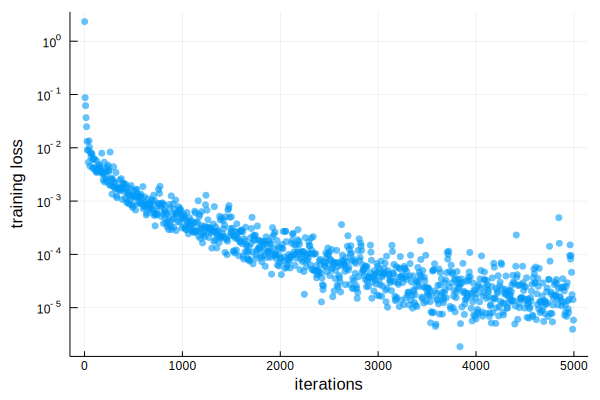

In [11]:
mu = 5e-1 # make lower till network learns
@time w_hat, b_hat, empirical_loss = learn2classify_sgd_1layer(
    f_a, df_a, grad_loss_1layer_1output,
    x, y, W0, b0, mu, iters, batch_size
)
plot_idx = 1:5:iters
scatter(
    plot_idx, empirical_loss[plot_idx],
    yscale=:log10,
    ylabel="training loss",
    xlabel="iterations",
    )

Has the network learned? If not, reduce the learning rate (or step size) `mu`. Once your network has learned, you can compute the output predicted by the trained neural network.

In [12]:
println("Training loss is $(empirical_loss[end])")

Training loss is 1.4900436955671773e-5


We now need use the trained network to  predict the output with the *learned weights and bias* when given input `x`.

**Exercise**:: Insert the learned weights `w_hat`, the learned bias `b_hat` and the activation function into the `g` function to predict the neural network output to the intput `x`.
        
    

In [13]:
y_hat = g(x, w_hat, b_hat, f_a) ##TODO: Fill in ??
loss = mean((y_hat - y).^2)

1.5816128781382448e-5

In [14]:
println("Loss is $loss")

Loss is 1.5816128781382448e-5


We now compare the output of the trained neural network to the training data.

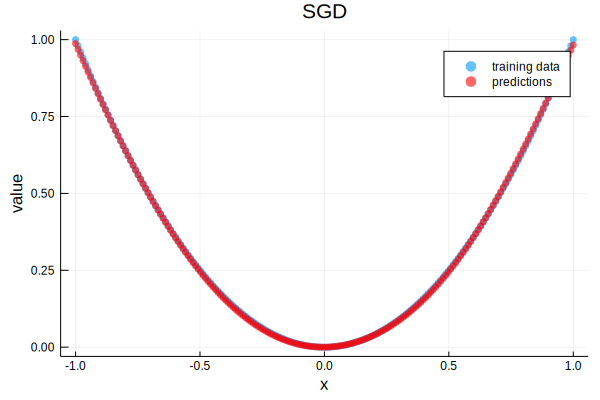

In [15]:
scatter(
    x[:], y[:], 
    label="training data", 
    xlabel="x", 
    ylabel="value", 
    title="SGD"
)
scatter!(x[:], y_hat[:]; color=:red, label="predictions")

Now set $n=16$ in the next cell and re-train the network.

  1.552945 seconds (31.78 M allocations: 1.029 GiB, 21.91% gc time)


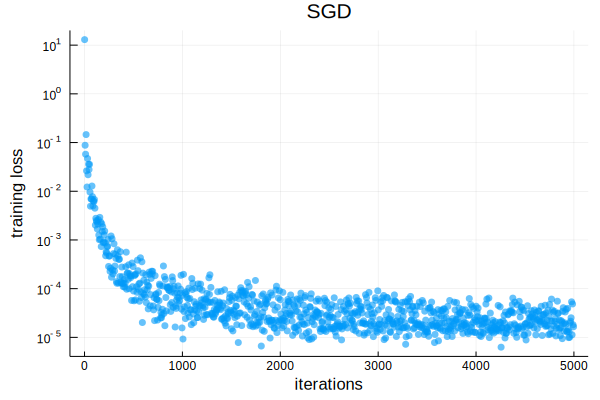

In [16]:
n, d = 16, 1
W0, b0  = randn(n, d), randn(n)
@time w_hat, b_hat, empirical_loss = learn2classify_sgd_1layer(
    f_a, df_a, grad_loss_1layer_1output, 
    x, y, W0, b0, mu, iters, batch_size
)
plot_idx = 1:5:iters
psgd = scatter(
    plot_idx, empirical_loss[plot_idx];
    yscale=:log10,
    ylabel="training loss",
    xlabel="iterations",
    title = "SGD"
)

Here is the new fit of the data.

loss = mean((y_hat - y) .^ 2) = 2.2025103850431987e-5


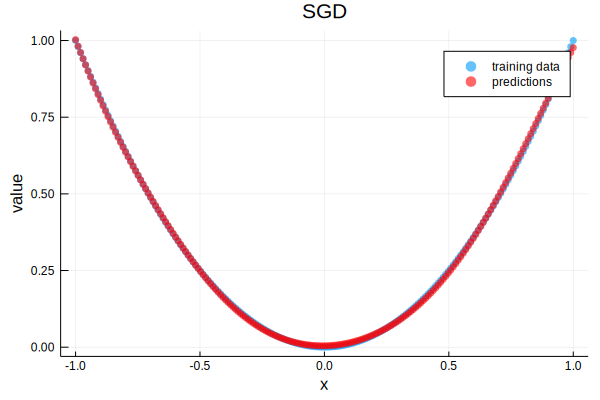

In [17]:
y_hat = g(x, w_hat, b_hat, f_a) 
@show loss = mean((y_hat - y).^2)
scatter(
    x[:], y[:],
    label="training data",
    xlabel="x",
    ylabel="value",
    title="SGD"
)
pfit_sgd = scatter!(x[:], y_hat[:]; color=:red, label="predictions")

With more neurons, it takes longer to learn, or to recognize that the network has not learned because the learning rate (or step size) is too high. (The lower the targeted loss after training, the longer it usually takes.) At some point, in practice, one might decide the loss is "low enough"; the objective is to try to get there with as few neurons as possible.

With this in mind, algorithms that can train the network faster have great practical utility. We now train the network with the accelerated stochastic gradient descent algorithm and see how much faster the network learns compared to the stochastic gradient descent.

  1.836875 seconds (32.13 M allocations: 1.049 GiB, 19.39% gc time)
loss = mean((y_hat - y) .^ 2) = 9.648766036362954e-7


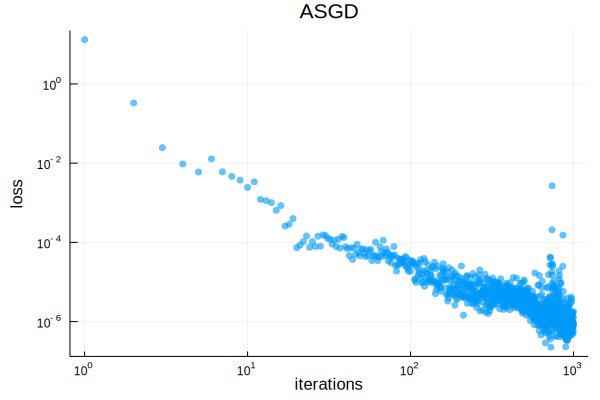

In [18]:
@time w_hat, b_hat, empirical_loss = learn2classify_asgd_1layer(
        f_a, df_a, grad_loss_1layer_1output,
        x, y, W0, b0, mu, iters, batch_size
)
y_hat = g(x, w_hat, b_hat, f_a)
@show loss = mean((y_hat - y).^2)
pasgd = scatter(empirical_loss[1:5:end]; scale=:log10, xlabel ="iterations", ylabel="loss", title="ASGD")

loss = mean((y_hat - y) .^ 2) = 9.648766036362954e-7


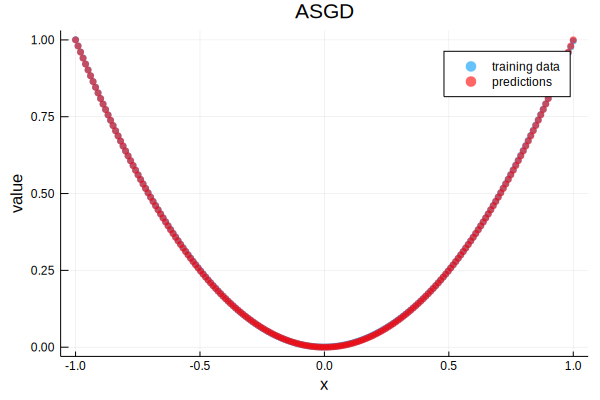

In [19]:
@show loss = mean((y_hat - y).^2)
scatter(x[:], y_hat[:];
    label="training data",
    xlabel="x",
    ylabel="value",
    title="ASGD"
)
pfit_asgd = scatter!(x[:], y[:]; color=:red, label="predictions")

We now compare the predictions and the learning curves of the SGD and ASGD algorithms.

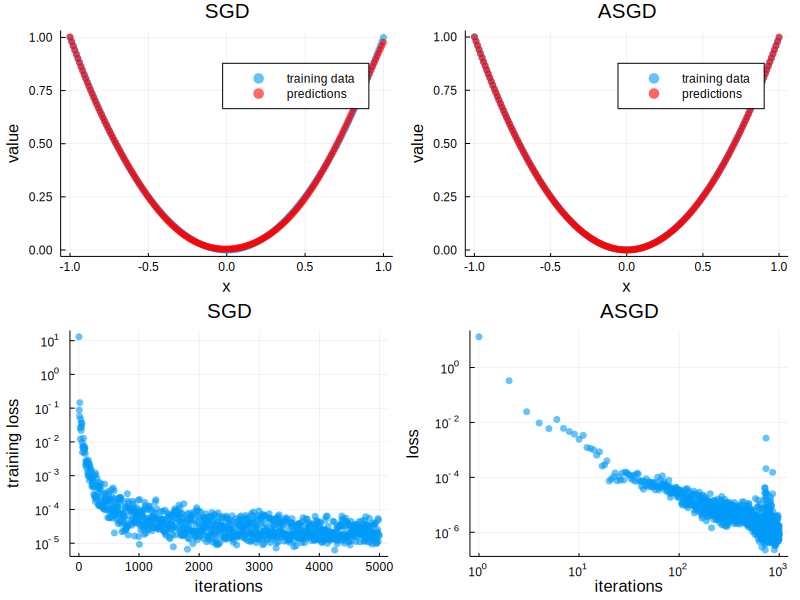

In [20]:
plot(
    plot(pfit_sgd, pfit_asgd; layout=(1, 2)),
    plot(psgd, pasgd; layout=(1, 2));
    layout=(2,1),
    size=(800, 600)
)

Hurray!

The worst-case convergence rate of $O(1/k^2)$ for the Nesterov algorithm (generically) versus $O(1/k)$ for the gradient descent algorithm makes a big difference! From now on, we will only use the accelerated stochastic gradient descent algorithm to train networks.

## Understanding how a neural network tells apart data from two categories 

We saw in the previous Chapter how a neural network can be used to tell apart two different handwritten digits. How exactly does the network accomplish that? By the end of this section we will understand:

- What the concept of linear separability tells us about whether two categories of data can be effectively distinguished from each other using a `linear` activation function.

- How a neural network with a non-linear activation function can tell apart two categories when a linear activation function cannot.

We begin by creating a function that  training datasets comprised of $N$ points belonging to Class 1, and $N$ points belonging to Class 2. The function reveals how we generated the points but that is not important for our discussion, so we will not bypass those details for now.

In [21]:
function generatedata(μ1, μ2, Σ1, Σ2, N)
    d = size(μ1, 1)
    X1 = μ1 .+ sqrt(Σ1) * randn(d, N)
    X2 = μ2 .+ sqrt(Σ2) * randn(d, N)
    return X1, X2
end   

generatedata (generic function with 1 method)

We now use this function to obtain training samples  from Class 1 and Class 2. Each sample is a two dimensional vector. The samples belonging to Class 1 are displayed in red, while the samples belonging to Class 2 are displayed in blue. Run the code in the next cell to produce a 2-D visualization of the data.

In [22]:
"Convenience method for plotting X[2, :] against X[1, :]"
scatter2d(X::Matrix; kwargs...) = scatter(X[1, :], X[2, :]; kwargs...)

"Add a scatter2d plot to an existing plot"
scatter2d!(X::Matrix; kwargs...) = scatter!(X[1, :], X[2, :]; kwargs...)

scatter2d!

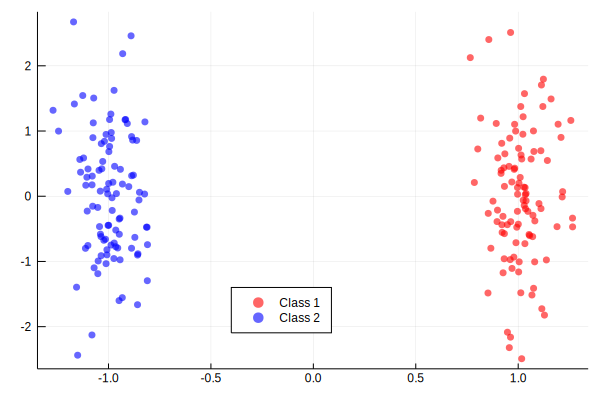

In [23]:
X1, X2 = generatedata([1; 0], [-1; 0], Diagonal([0.01; 1]), Diagonal([0.01; 1]), 100)
scatter2d(X1; color="red", label="Class 1", legend=:bottom)
scatter2d!(X2; color="blue", label="Class 2")

Now suppose we were given a test vector $x_{\rm test}$ that we wish to label (or classify). In other words we wish to determine if it "belongs" to Class 1 or Class 2. We could  try to answer the question visually by superimposing the values of this test vector onto the plot of the training sample we  previously generated, as in the next cell.

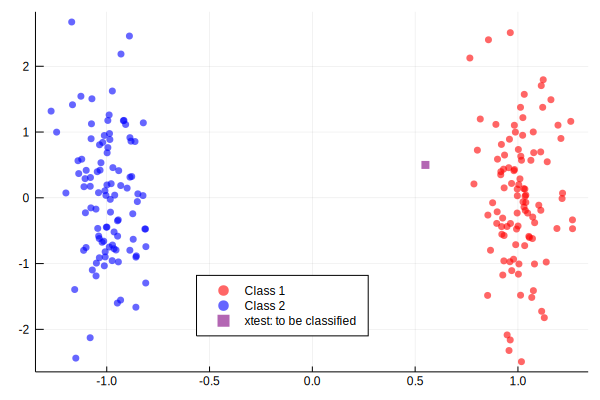

In [24]:
xtest = [0.55, 0.5] ## test vector
scatter2d(X1; color="red", label="Class 1", legend=:bottom)
scatter2d!(X2; color="blue", label="Class 2")
scatter!(xtest[1, :], xtest[2, :]; color="purple", marker=:square, label="xtest: to be classified")

## Linear separability of two classes

From an inspection of the above plot, we might reasonably conclude that the test vector is "closer to" the points in Class 1, and hence should be classified as belonging to Class 1. Now imagine that we are working with data  $m > 3$, so we cannot make this classification visually. Can we reach the same conclusion computationally? In other words, can we computationally determine whether two classes are *linearly separable*?

The two classes shown above are linearly separable if there exists at least one line in the plane with all of the blue points on one side, and all the red points on the other side. We will express this mathematically in a moment.

(Note: to generalize this idea to higher dimensions, we simply replace  *line* with *hyperplane*.)

Indeed! 

A line in 2-D is defined by the equation

$$ w_1 x_1 + w_2 x_2 + b = 0,$$

and it separates the 2-D plane into two regions. One region has

$$ w_1 x_1 + w_2 x_2 + b > 0,$$

while the other region has

$$ w_1 x_1 + w_2 x_2 + b < 0.$$

In other words, the sign changes as one crosses the line. In the next cell, we vary $w_1$, $w_2$, and $b$, and we color the points on the plane white or black depending on whether the sign of $ w_1 x_1 + w_2 x_2 + b$ is positive or negative at that point. 

Notice that for certain values of $w_1$, $w_2$ and $b$, the line that separates the black and white regions also linearly separates the red and blue points.

In [25]:
x1range = range(-5; stop=5, length=100)
x2range = range(-5; stop=5, length=100)
@manipulate for w₁ in (-1.0, -0.5, 0.0, 0.5, 1.0),
                w₂ in (-1.0, -0.5, 0.0, 0.5, 1.0),
                b in (-1.0, -0.5, -0.25, 0.0, 0.25, 0.5, 1.0),
                show_sign_only = true

    D = [x1 * w₁ + x2 * w₂ + b for x2 in x2range, x1 in x1range]
    if show_sign_only
        D = sign.(D)
    end

    heatmap(x1range, x2range, D; color=:grays)
    scatter2d!(X1; color="red", label="class 1")
    scatter2d!(X2; color="blue", label="class 2")
    scatter!(
        xtest[1, :], xtest[2, :]; 
        color="purple", 
        marker=:square,
        label="x = point to be classified",
        legend=:bottomleft
    )        
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["w₁"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :span), Any[Node{DOM}(DOM(:html, :label), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text : key")))], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol,Any}(:attributes=>("data-bind"=>"foreach : options_js"),:className=>"buttons has-addons is-centered"))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[], Dict{Symbol,Any}())], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("options_js"=>(Observable{Any} with 1 listeners. Value:
OrderedDict[OrderedDict{String,Any}("key"=>"-1.0","val"=>1,"id"=>"idikFVIUfe"), OrderedDict{String,Any}("key"=>"-0.5","val"=>2,"id"=>"idIV8Ijuaj"), OrderedDict{String,Any}("key"=>"0.0","val"=>3,"id"=>"idQb7DhRgg"), OrderedDict{String,Any}("key"=>"0.5","val"=>4,"id"=>"idw35WfNqp"), OrderedDict{String,Any}("key"=>"1.0","val"=>5,"id"=>"idkOAz1PPX")], nothing),"index"=>(Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/nbuser/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/nbuser/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/nbuser/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/nbuser/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/nbuser/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("options_js"=>Any[JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Condition(Any[Task (runnable) @0x00007ffabd00e4a0])), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"options_js\":WebIO.getval({\"name\":\"options_js\",\"scope\":\"3927769896419997396\",\"id\":\"ob_05\",\"t

There are several lines that separate the red and blue points. 

Let us now train the network and see what line it selects. 

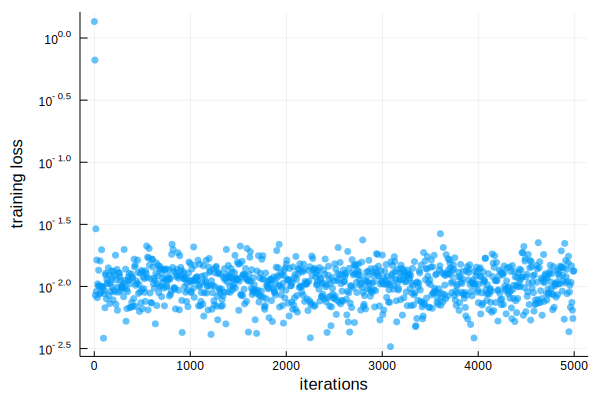

In [26]:
trainX = hcat(X1, X2)
class_vector = [-ones(1, size(X1, 2)) ones(1, size(X2, 2))]
n, d = 1, 2
mu = 5e-2 ## TODO: reduce this till network learns
W0 = randn(n, d)
b0 = rand(1)
w_hat, b_hat, empirical_loss = learn2classify_asgd_1layer(
    linear, dlinear, grad_loss_1layer_1output,
    trainX, class_vector, W0, b0, mu, iters, batch_size
)
plot_idx = 1:5:iters
scatter(
    plot_idx, empirical_loss[plot_idx];
    yscale=:log10,
    ylabel="training loss", 
    xlabel="iterations",
    label = ""
)

**Exercise**:

Has the network learned?  A `No strict ticks found` message means that the loss values are exploding. Try reducing the learning rate (or step size) `mu`.

In [27]:
println("Training loss is $(empirical_loss[end])")

Training loss is 0.017413885187099416


Now that your network has learned, we can color the plane on either side of the plane as white or black depending on whether `x1 * w_hat[1] + x2 * w_hat[2] + b_hat > 0 ` or `x1 * w_hat[1] + x2 * w_hat[2] + b_hat < 0 `, respectively. 

We then superimpose on this the blue and red points. This is accomplished using the code in the next cell.  

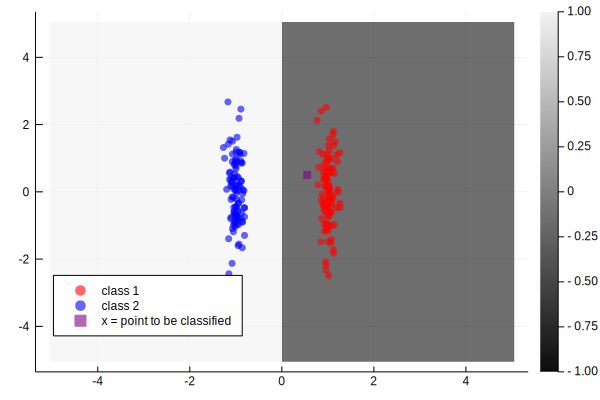

In [28]:
D = [sign(x1 * w_hat[1] + x2 * w_hat[2] + b_hat[1]) for x2 in x2range, x1 in x1range]
heatmap(x1range, x2range, D; color=:grays)
scatter!(X1[1, :], X1[2, :]; color="red", label="class 1")
scatter!(X2[1, :], X2[2, :]; color="blue", label="class 2")
scatter!(
    xtest[1, :], xtest[2, :];
    color="purple", 
    marker=:square, 
    label="x = point to be classified",
    legend=:bottomleft
)

Least squares and asgd give same answer! Yay!

## Separating linearly non-separable classes with a neural network

We now consider an example where the two classes are not linearly separable. The function in the next code cell generates two training datasets comprised of $N$ points belonging to Class 1 and $N$ points belonging to Class 2. Points in Class 1 (roughly) lie on a circle with radius `r1` while points in Class 2 (roughly) lie on a circle with radius `r2`.

In [29]:
function generatedata_circle(r1, r2, N, σ=0.1)
    ϕ1 = range(0; stop=(2 * π), length=N)
    ϕ2 = range(0; stop=(2 * π), length=N)
    rx1 = r1 .+ σ * randn(N)
    rx2 = r2 .+ σ * randn(N)
    X1 = [rx1 .* cos.(ϕ1) rx1 .* sin.(ϕ1)]
    X2 = [rx2 .* cos.(ϕ2) rx2 .* sin.(ϕ2)]
    return Array(X1'), Array(X2')
end

generatedata_circle (generic function with 2 methods)

# The code in the next cell generates samples for Class 1 and Class 2 and plots them on the 2-D plane. 

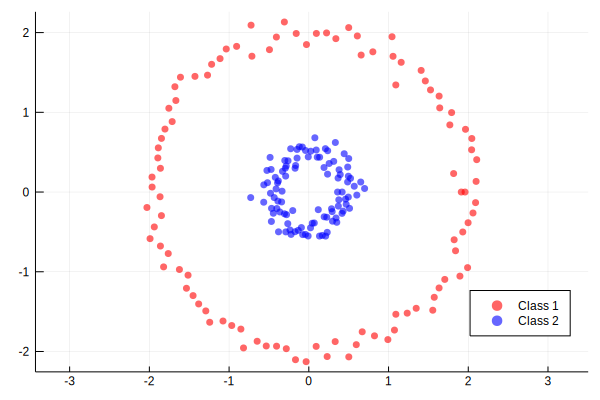

In [30]:
X1c, X2c = generatedata_circle(2, 0.5, 100)
p1 = scatter2d(X1c; color="red", label="Class 1", aspectratio=:1.0)
scatter2d!(X2c; color="blue", label="Class 2", legend=:bottomright)

length(class_vector)

We will now use a neural network with a `tanh` activation function to learn to classify the red and blue points.

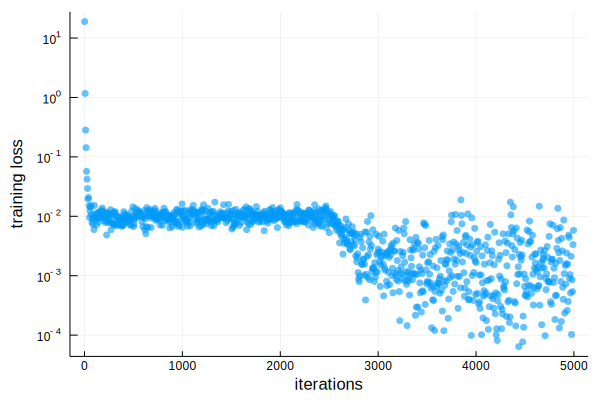

In [31]:
trainXc = hcat(X1c, X2c)
n, d = 8, 2  ##TODO: d = ?
batch_size = 50
W0, b0 = rand(n, d), rand(n)
f_a, df_a = tanh, dtanh
mu = 1e-1 ## make smaller till network learns
w_hat, b_hat, empirical_loss = learn2classify_asgd_1layer(
    f_a, df_a, grad_loss_1layer_1output,
    trainXc, class_vector, W0, b0, mu, iters, batch_size
)
plot_idx = 1:5:iters
scatter(
    plot_idx, empirical_loss[plot_idx];
    yscale=:log10,
    ylabel="training loss",
    xlabel="iterations",
)

**Exercise**:

Did your network learn? If not, reduce the value for the learning rate `mu` until it does. We will now display the decision region by plotting the sign of the function `g(x, w_hat, b_hat, f_a)` for values of the 2 dimensional vector `x` in the plane, as in the next cell.

In [32]:
println("Training loss is $(empirical_loss[end])")

Training loss is 0.0070984124995875555


We now plot the learned decision boundary.

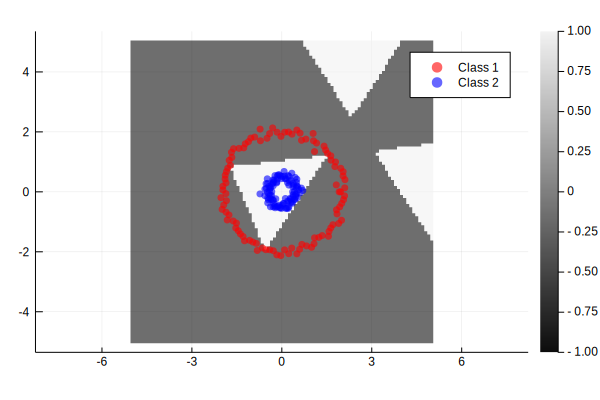

In [33]:
D = [g([x1; x2], w_hat, b_hat, f_a)[1] for x2 in x2range, x1 in x1range] 
heatmap(x1range, x2range, sign.(D); color=:grays) 
scatter2d!(X1c; color="red", label="Class 1", aspectratio=:1.0)
scatter2d!(X2c; color="blue", label="Class 2")

Let us now increase the number of neurons in the hidden layer and see how the decision region changes. 

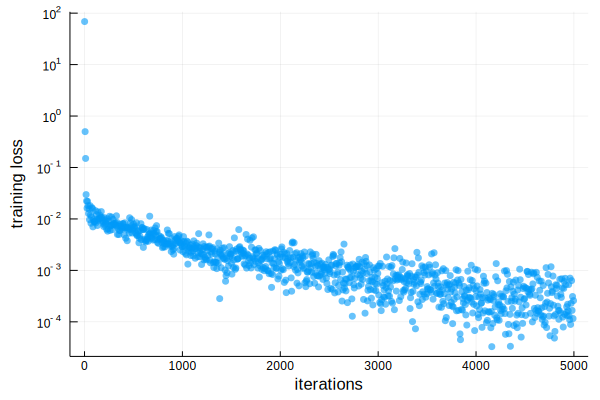

In [34]:
n, d = 16, 2
mu = 1e-1
W0, b0 = rand(n, d), rand(n)
f_a, df_a = tanh, dtanh
w_hat, b_hat, empirical_loss = learn2classify_asgd_1layer(
    f_a, df_a, grad_loss_1layer_1output,
    trainXc, class_vector, W0, b0, mu, iters, batch_size
)
plot_idx = 1:5:iters
scatter(plot_idx, empirical_loss[plot_idx];
    yscale=:log10,
    ylabel="training loss",
    xlabel="iterations"
)

In [35]:
println("Training loss is $(empirical_loss[end])")

Training loss is 0.0001365222081872169


We now display the decision region produced when $n = 16$.  

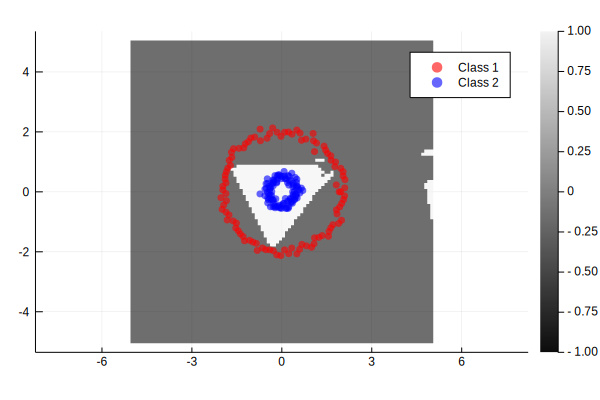

In [36]:
D = [g([x1; x2], w_hat, b_hat, f_a)[1] for x2 in x2range, x1 in x1range]
heatmap(x1range, x2range, sign.(D); color=:grays) 
scatter2d!(X1c; color="red", label="Class 1", aspectratio=:1.0)
scatter2d!(X2c; color="blue", label="Class 2")

**Exercise**:

How does the decision region for $n = 16$ compare to the $n = 8$ setting?  Comment on the shape of the decision boundary. What does it get right? what seems odd? 

it is complicated decision boundary with n = 16

You just saw how, by choosing an approrpiate value of  `mu`, you trained a neural network to separate classes that are *not* linearly separable**. This is the power of neural networks -- they are amazingly good at approximating crazily complicated functions -- this is referred to as  [universal approximation property](http://neuralnetworksanddeeplearning.com/chap4.html). 

There are situations where a linear network will *also* work  well, as it did for the handwriting recongition example. In those cases, we expect a neural network with a non-linear activation function to do even better. 

But it's worth re-stating: **there are situations where a linear network fails but a non-linear neural network succeeds**. This is what has made neural networks a must-try and must-know tool for any data scientist.

# Fitting vector-valued multivariate functions

We will now try to fit a vector valued output vector of the form

$$y = \begin{bmatrix} y_1 , \ldots, y_n \end{bmatrix},$$

using the neural network shown below.

<img src="multiclass_neuron.png" alt="Drawing" style="width: 450px;"/>

The **output of the neural network** is given by

$$ g_i(x) = f\left(\sum_{j=1}^{d} w_{ij} x_j +b_i\right).$$

The mean squared error **loss function** is defined as

$$L(x,y,W,b)  = \dfrac{1}{N} \sum_{k=1}^{N} \sum_{i=1}^{n} \left(y_i^{(k)} - g_i(x^{(k)})\right)^2.$$

Equivalently

$$L(x,y,W,b) = \dfrac{1}{N} \sum_{k=1}^{N} \sum_{i=1}^{n} \left[ y_i^{(k)} -  f\left(\sum_{j=1}^{d} w_{ij} x_j^{(k)} +b_i\right) \right]^2.$$

We will use the gradient descent algorithm to learn the weights and biases.

We compute the gradients

$$\nabla_{w_{pq}} L(x,y,W,b)= -\dfrac{2}{N}\sum_{k=1}^{N} \left[ y_p^{(k)} - f\left( \sum_{j=1}^{d} w_{pj} x_{j}^{(k)} +  b_p\right) \right] f'\left(\sum_{j=1}^{d} w_{pj} x_{j}^{(k)} + b_p\right) x_{q}^{(k)} ,$$

and
$$\nabla_{b_p} L(x,y,W,b) = -\dfrac{2}{N} \sum_{k=1}^{N} \left[ y_p^{(k)} - f\left( \sum_{j=1}^{d} w_{pj} x_{j}^{(k)} +  b_p\right) \right] f'\left(\sum_{j=1}^{d} w_{pj} x_{j}^{(k)} + b_p\right) .$$

**Exercise**:

Implement a function `grad_loss_1layer` that takes as its input `f_a`, `df_a`, `x`, `y`, `W` and `b` and reutrns as its output the  matrix of gradients of the weight matrix, the bias gradient vector and the loss.  

In [37]:
"""
    dW, db, loss = grad_loss_1layer(f_a, df_a, x, y, W, b)

Inputs:
* `x` is a d x N Array{Float64,2} -- even when d = 1
* `y` is a n x N  Array{Float64,2}
* `W` is an n x d Array{Float64,2} 
* `b` is n element Array{Float64,1}

Outputs:
* `dW`: gradients with respect to weights
* `db`: gradients with respect to biases
* `loss`: loss function value
"""
function grad_loss_1layer(
        f_a::Function,
        df_a::Function, 
        x::Matrix, 
        y::Matrix, 
        W::Matrix,
        b::Vector
    )

    n, d = size(W) ##TODO: ?? & quiz
    N = size(y,2) ## assume y is matrix of size n x N
    
    dW = zeros(n, d) 
    db = zeros(n)
    loss = 0.0

    for k in 1:N
        for p in 1:n
            error = y[p, k] - f_a(W[p, :]' * x[:, k] + b[p])
            common_term = error * df_a(W[p, :]' * x[:, k] + b[p])
            for q in 1:d
                # TODO: Fill in the ??
                dW[p, q] = dW[p, q] - 2 / N * common_term * x[q, k]
            end
            # TODO: Fill in ??
            db[p] = db[p] - 2 / N * common_term 
            # TODO: Fill in the ??
            loss = loss + 1 / N * error^2
        end
    end
    return dW, db, loss
end        

grad_loss_1layer

This gradient function can be directly used with the gradient descent algorithm you programmed earlier to learn a multivariate, vector-valued function!

## Application: Handwriting recognition of more than 2 digits at a time

We will now use the ability to learn a multivariate vector-valued function to learn to classify $d$-dimensional input data with $n > 2$ classes. The reason this is a vector-valued function is because we will encode the class vectors as corners of a standard $d$-dimensional hypercube.

**One-hot encoding of class vectors**

Thus when $d = 3$, we will encode our three classses as follows: we encode Class 1 as the vector 

$$e_1 = \begin{bmatrix}1 & 0 & 0 \end{bmatrix}^T,$$ 

Class 2 as the vector 

$$e_2 = \begin{bmatrix}0 & 1 & 0 \end{bmatrix}^T,$$ 

and Class 3 as the vector  

$$e_3 = \begin{bmatrix}0 & 0 & 1 \end{bmatrix}^T.$$

In general, if there are $m$ classes, the $i$-th class is encoded by the $i$-th column of the $m \times m$ Identity matrix. This is referred to as **one-hot encoding**, because only the single "hot" index is one, while the rest of the indices are zero.  

**Class prediction rule**

If $\widehat{W}$ and $\widehat{b}$ denote the learned weight matrix and bias vector, then the class prediction is made according to the rule:

\begin{equation}
 \textrm{Predicted class of vector } x_{{\rm test}} = \textrm{index of largest coordinate of } f_{\rm a}.(\widehat{W} x_{\rm test} + \widehat{b}) 
\end{equation}

In the **additional exercises** we will walk you through how we arrived at this decision rule.

Let's load some handwritten digit data in the next two cells.

In [38]:
function load_digit_data(digit::Integer, nx::Integer=28, ny::Integer=28, nrep::Integer=1000)
    filepath = "data" * string(digit)
    
    x = open(filepath, "r") do file
        reshape(read(file), (nx, ny, nrep)) # what is the type of x0?
    end
    
   return x
end

load_digit_data (generic function with 4 methods)

In [39]:
data_digits = [1, 5, 9]
num_digits = length(data_digits)
x0 = load_digit_data(data_digits[1])
x1 = load_digit_data(data_digits[2])
x2 = load_digit_data(data_digits[3]);

We now encode the class vectors into corners of a 3 dimensional cube using the construction described earlier.  

This is accomplished as in the next cell, where we also create dictionaries for looking up the class label from its encoding and vice versa.  

In [40]:
class_label_vector = collect(1:num_digits)
class_encoding_matrix = diagm(0 => ones(num_digits))
digit2class = Dict(string(data_digits[i]) => class_label_vector[i] for i in 1:length(data_digits) )
class2digit = Dict(value => key for (key, value) in digit2class)

Dict{Int64,String} with 3 entries:
  2 => "5"
  3 => "9"
  1 => "1"

We generate the training and test matrices as in the `Learn2Classify` code, and encode the test vector using the Kronecker product.

In [41]:
xtrain = hcat(
    reshape(x0[:, :, 1:500], 784, :), 
    reshape(x1[:, :, 1:500], 784, :),
    reshape(x2[:, :, 1:500], 784, :)
)

# Note: the next line does the same thing as the previous 
# five lines (except for test rather than train data).
# It is more concise and should still be readable if you
# are familiar with the "splat" operator
xtest = hcat((reshape(x[:, :, 501:1000], 784, :) for x in (x0, x1, x2))...)

test_labels = kron(1:num_digits, ones(500))
yvector = hcat(
    kron(ones(500)', class_encoding_matrix[:, 1]),
    kron(ones(500)', class_encoding_matrix[:, 2]),
    kron(ones(500)', class_encoding_matrix[:, 3])
)

3×1500 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0

We now train the network with `d = 784` and n = `num_digits`. 


mu = 7.0e-11 = 7.0e-11


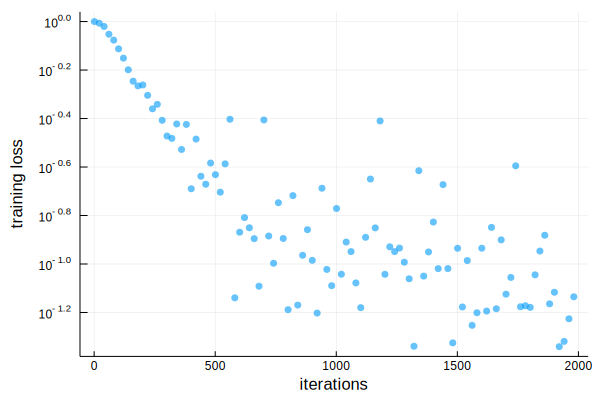

In [42]:
n = num_digits
d = 784
@show mu = 7e-11 ## make lower if it does notlearn  
W0 = zeros(n, d) ## why did we initialize with 0?
b0 = zeros(n)
iters = 2000 
wlinear, blinear, loss_linear = learn2classify_asgd_1layer(
    linear, dlinear, grad_loss_1layer,
    xtrain, yvector, W0, b0, mu, iters
)
scatter(
    1:20:iters, loss_linear[1:20:end],
    yscale=:log10,
    xlabel="iterations",
    ylabel="training loss"
)

**Exercise**: 

Vary the step size `mu` below till the network learns. If you get a `no strict ticks` error or a `NaN` for the training loss, it means that your training loss is not finite and you will have to reduce the learning rate till it learns. 

Hint: A good learning rate will ensure that the network attains a low enough loss runs every time. The trick (and art) is to start with a rate, see if it learns, and keep reducing if it does not.

In [43]:
println("Training loss is $(loss_linear[end])")

Training loss is 0.1457458695178228


We now visualize the weight matrices learned.

In [44]:
reshape(wlinear[1, :], (28, 28))

28×28 Array{Float64,2}:
 0.0  0.0  0.0   0.0          0.0         …   0.0          0.0       
 0.0  0.0  0.0   0.0          0.0             0.0          0.0       
 0.0  0.0  0.0   0.0          0.0             0.0          0.0       
 0.0  0.0  0.0   0.0          0.0            -4.26026e-7   0.0       
 0.0  0.0  0.0   0.0          9.23255e-7     -2.97735e-6   0.0       
 0.0  0.0  0.0   0.0          0.0         …  -2.17923e-6   0.0       
 0.0  0.0  0.0   0.0          0.0            -1.77194e-6   0.0       
 0.0  0.0  0.0   0.0          4.01541e-6     -4.70038e-6   0.0       
 0.0  0.0  0.0   0.0          1.098e-5       -8.74579e-6   0.0       
 0.0  0.0  0.0   0.0          3.21241e-6     -1.25721e-6   0.0       
 0.0  0.0  0.0   0.0          2.58923e-6  …   8.8496e-6    0.0       
 0.0  0.0  0.0   3.78326e-7   1.49772e-5      6.98061e-6   0.0       
 0.0  0.0  0.0   1.68894e-6   2.87774e-5      2.16684e-6  -4.34314e-8
 ⋮                                        ⋱                       

In [45]:
function disp_vector_as_img(img_vector::Array; nx::Integer=28, ny::Integer=28, kwargs...)
    return heatmap(
        Array(vcat(mapslices(v -> [reshape(v, nx, ny)], img_vector; dims=2)...)');
        color=:grays,
        aspect_ratio=1.0,
        axis=false,
        grid=false,
        size=(500, 200),
        kwargs...
    )
end

disp_vector_as_img (generic function with 1 method)

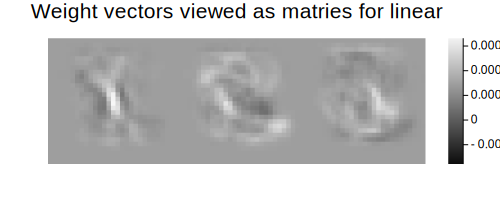

In [46]:
disp_vector_as_img(wlinear; title="Weight vectors viewed as matries for linear")

How well does this network classify the digits in the test dataset? We determine this in the next cell. 

pcorrect = sum(class_predictions_linear .== test_labels) / length(test_labels) = 0.982


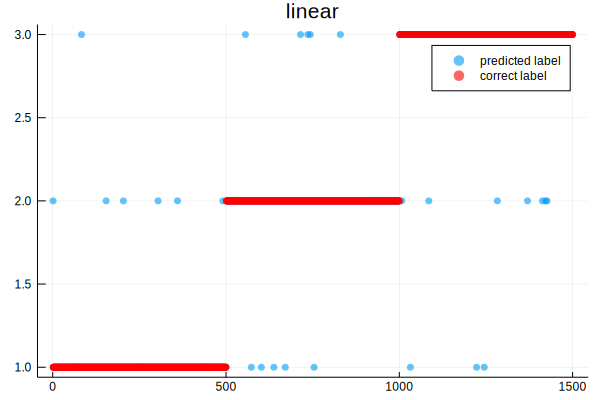

In [47]:
Ylinear = linear.(wlinear * xtest .+ blinear)
class_predictions_linear = vec(mapslices(x -> findmax(x)[2], Ylinear; dims=1)) 
@show pcorrect = sum(class_predictions_linear .== test_labels) / length(test_labels)
scatter(class_predictions_linear; label="predicted label", title="linear")
scatter!(test_labels; color="red", label="correct label")

Let us compare this with the predictions of the `tanh` neural network. 

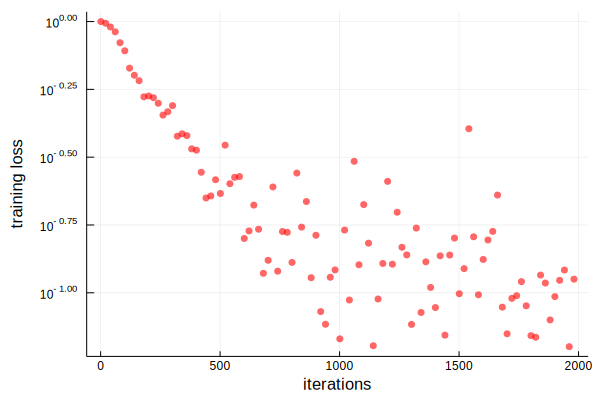

In [48]:
wtanh, btanh, loss_tanh = learn2classify_asgd_1layer(
    tanh, dtanh, grad_loss_1layer,
    xtrain, yvector, W0, b0, mu, iters
)
scatter(
    1:20:iters, loss_tanh[1:20:end];
    color=:red,
    yscale=:log10,
    xlabel="iterations",
    ylabel="training loss"
)

In [49]:
println("Training loss is $(loss_tanh[end])")

Training loss is 0.1925486924473328


We now determine how well the network with the `tanh` activation function classifies digits in the test dataset.

pcorrect = sum(class_predictions_tanh .== test_labels) / length(test_labels) = 0.9726666666666667


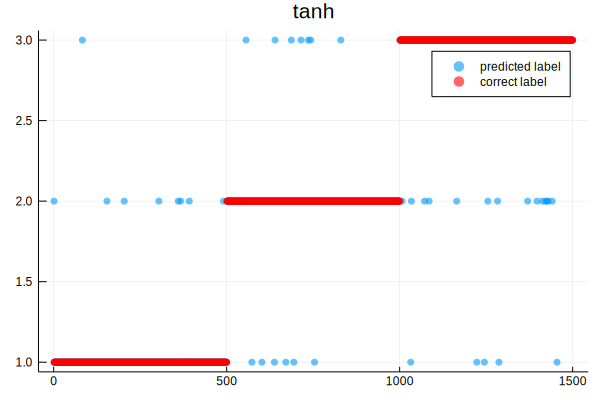

In [50]:
Ytanh = tanh.(wtanh * xtest .+ btanh)
class_predictions_tanh = vec(mapslices(x -> findmax(x)[2], Ytanh; dims=1))
@show pcorrect = sum(class_predictions_tanh .== test_labels) / length(test_labels)
scatter(class_predictions_tanh; label="predicted label", title="tanh")
scatter!(test_labels; color="red", label="correct label")

The weights learned by the `tanh` network are displayed in the next cell. Compare it to that learned by the `linear` network.

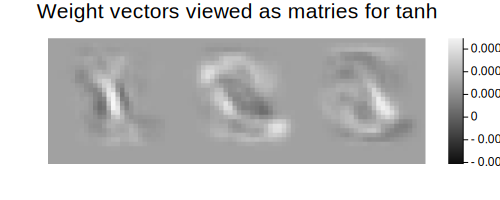

In [51]:
disp_vector_as_img(wtanh; title="Weight vectors viewed as matries for tanh")

**Exercise**: Comment on the similarity and differences between the weights learned by the `tanh` network and the `linear` network?

The edges are more sharp for tanh activation and the range of the values is greater

## Recognizing *your* handwriting 

In [52]:
using Pkg
include("drawnumber.jl")

┌ Info: Precompiling Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1186
┌ Info: Precompiling ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1186


image (generic function with 2 methods)

We first create a function to predict the digit from the image returned by the inline drawing app -- note how we are processing the image returned by the app based on what we learned in `Learn2Classify` codex.  

In [53]:
function predict_digit(
        app::Canvas, 
        class2digit::Dict, 
        f_a::Function, 
        w::Matrix,
        b::Vector
    )
    # Use image(app, (28, 28)) to get the current image at 28x28 resolution.
    my_img_from_app = Gray.(image(app, (28, 28)))
    my_img_from_app = float(1 .- my_img_from_app)
    my_img = 255 * (my_img_from_app')
    
    my_img_vector = (my_img[:])
    hiddenlayer_output = f_a.(w * my_img_vector + b)
    class_prediction = mapslices(x -> findmax(x)[2], hiddenlayer_output; dims=1)
    my_digit_prediction = class2digit[class_prediction[]]
    return my_img, my_digit_prediction, hiddenlayer_output
end

predict_digit (generic function with 1 method)

The code cell below creates an area for drawing the digit. Note that your network is trained to distinguish only "1", "5", and "9"; if you want it to accurately identify a digit, you will need to draw one of these.

In [54]:
app = Canvas()

Canvas(Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :canvas), Any[], Dict{Symbol,Any}(:style=>Dict("display"=>"block","border"=>"1px solid #ccc"),:height=>250,:width=>250)), Node{DOM}(DOM(:html, :button), Any["Clear"], Dict{Symbol,Any}(:events=>Dict("click"=>JSString("function() {\n    const canvas = _webIOScope.dom.querySelector(\"canvas\");\n    canvas.clear();\n    _webIOScope.setObservableValue(\"data\", \"\");\n}\n"))))], Dict{Symbol,Any}(:style=>Dict("align-items"=>"center","display"=>"flex","flex-direction"=>"column","justify-content"=>"space-evenly"))), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("image"=>(Observable{Any} with 0 listeners. Value:
nothing, false),"data"=>(Observable{String} with 1 listeners. Value:
"", nothing)), Set(String[]), nothing, Asset[], Dict{Any,Any}(), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Condition(Any[Task (runnable) @0x00007ffabfaa1fc0])), WebIO.JSString[JSString("function() {\n    const canvas = this.dom.querySelector(\"canvas\");\n    let path = [];\n    \n    canvas.clear = function () {\n        path = [];\n        redraw();\n    }\n\n    const context = canvas.getContext(\"2d\");\n    context.lineWidth = 20;\n    context.strokeStyle = 'black';\n    context.lineJoin = \"round\";\n\n    let lastPoint = [0, 0];\n    let isDrawing = false;\n\n    function currentPoint(e) {\n        const rect = canvas.getBoundingClientRect();\n        return [e.clientX - rect.left, e.clientY - rect.top];\n    }\n\n    function redraw() {\n        console.log(\"redraw\", path);\n        canvas.getContext(\"2d\").clearRect(0, 0, canvas.width, canvas.height);\n        let last = null;\n        for (const point of [...path, null]) {\n            if (last === null) {\n                context.moveTo(...point);\n                context.beginPath();\n            }\n            if (point === null) {\n                context.stroke();\n                context.closePath();\n            } else {\n                context.lineTo(...point);\n            }\n            last = point;\n        }\n    }\n\n    function drawLine(begin, end) {\n        context.beginPath();\n        context.moveTo(...begin);\n        context.lineTo(...end);\n        context.stroke();\n        context.lineWidth = 20;\n        context.lineJoin = \"round\";\n        context.strokeStyle = 'black';\n        context.closePath();\n    }\n\n    canvas.addEventListener(\"mousemove\", (event) => {\n        const point = currentPoint(event);\n        if (isDrawing) {\n            path.push(point);\n            redraw();\n        }\n        lastPoint = point;\n    });\n\n    canvas.addEventListener(\"mousedown\", (event) => {\n        lastPoint = currentPoint(event);\n        isDrawing = true;\n    });\n\n    // Note: we do window here to handle when the mouseup happens outside of the\n    // canvas element\n    window.addEventListener(\"mouseup\", (event) => {\n        if (!isDrawing) {\n            return;\n        }\n        drawLine(lastPoint, currentPoint(event));\n        this.setObservableValue(\"data\", canvas.toDataURL())\n        isDrawing = false;\n        path.push(null);\n    });\n}\n")]))

Having acquired the image, the following code cell uses the learned parameters to make and display the predicted digit. 

Tip: Make sure your digit occupies the center of the box.

In [55]:
my_img, my_digit_prediction, hiddenlayer_output = predict_digit(app, class2digit, tanh, wtanh, btanh)

p1 = heatmap_digit(my_img; title="Network predicts $my_digit_prediction")
xticks = parse.(Int64, [class2digit[i] for i in 1:length(keys(class2digit))])
x = 1:length(hiddenlayer_output)

p2 = bar(
    x, hiddenlayer_output; 
    xlabel="label",
    ylabel="Hidden layer output",
    xticks=(x, xticks)
)
plot(p1, p2; layout=(1, 2), size=(800, 350)) 
# you might have to run it multiple times if the "label" does not show up -- seems to be a gr bug :-(

MethodError: MethodError: no method matching imresize(::Nothing, ::Tuple{Int64,Int64})
Closest candidates are:
  imresize(!Matched::AbstractArray{T,N}, ::Tuple{Vararg{Int64,N}}) where {T, N} at /home/nbuser/.julia/packages/ImageTransformations/7wC0C/src/resizing.jl:221
  imresize(!Matched::AbstractArray, ::Union{Tuple{Vararg{AbstractUnitRange,M}}, Tuple{Vararg{Int64,M}}}) where M at /home/nbuser/.julia/packages/ImageTransformations/7wC0C/src/resizing.jl:179

**Exercise**:

Extend this computation for all 10 digits. What do you obtain for the probability of correct classification for the `linear` activation function?

In [56]:
## TODO: Your code for computing Pcorrect over all digits
data_digits = [1, 2, 3, 4, 5, 6, 7, 8, 9, 0]
num_digits = length(data_digits)
# I am interchanging 1 and 10 just for convenience 
x0 = load_digit_data(data_digits[10])
x1 = load_digit_data(data_digits[1])
x2 = load_digit_data(data_digits[2])
x3 = load_digit_data(data_digits[3])
x4 = load_digit_data(data_digits[4])
x5 = load_digit_data(data_digits[5])
x6 = load_digit_data(data_digits[6])
x7 = load_digit_data(data_digits[7])
x8 = load_digit_data(data_digits[8])
x9 = load_digit_data(data_digits[9])
class_label_vector = collect(1:num_digits)
class_encoding_matrix = diagm(0 => ones(num_digits))
digit2class = Dict(string(data_digits[i]) => class_label_vector[i] for i in 1:length(data_digits))
class2digit = Dict(value => key for (key, value) in digit2class)

xtrain = hcat((reshape(x[:, :, 1:500], 784, :) for x in (x0, x1, x2, x3, x4, x5, x6, x7, x8, x9))...)
xtest = hcat((reshape(x[:, :, 501:1000], 784, :) for x in (x0, x1, x2, x3, x4, x5, x6, x7, x8, x9))...)

test_labels = kron(1:num_digits, ones(500))
yvector = hcat((kron(ones(500)',class_encoding_matrix[:,i]) for i in 1:num_digits)...)

10×5000 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0

mu = 7.0e-10 = 7.0e-10


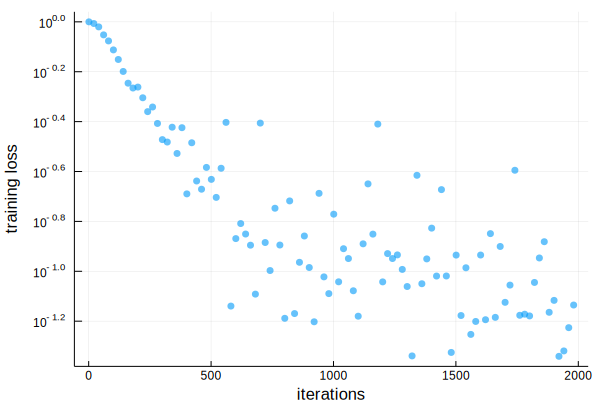

In [57]:
n = num_digits
d = 784
@show mu = 7e-10
W0 = zeros(n, d) 
b0 = zeros(n)
iters = 2000 
wlinearm, blinearm, loss_linearm = learn2classify_asgd_1layer(
    linear, dlinear, grad_loss_1layer,
    xtrain, yvector, W0, b0, mu, iters
)
scatter(
    1:20:iters, loss_linear[1:20:end],
    yscale=:log10,
    xlabel="iterations",
    ylabel="training loss"
)

pcorrect = sum(class_predictions_linearm .== test_labels) / length(test_labels) = 0.8154


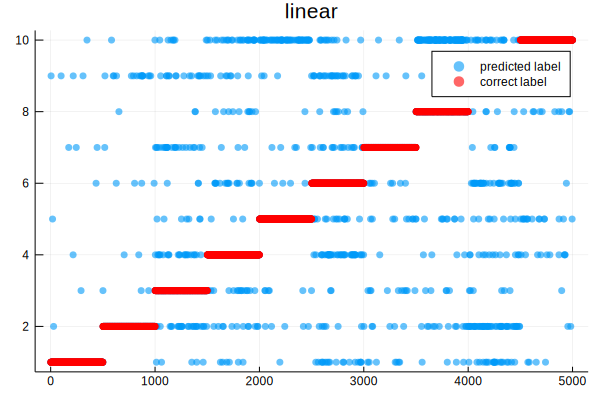

In [58]:
Ylinearm = linear.(wlinearm * xtest .+ blinearm)
class_predictions_linearm = vec(mapslices(x -> findmax(x)[2], Ylinearm; dims=1)) 
@show pcorrect = sum(class_predictions_linearm .== test_labels) / length(test_labels)
scatter(class_predictions_linearm; label="predicted label", title="linear")
scatter!(test_labels; color="red", label="correct label")

**Exercise**:

Extend this computation for all 10 digits. What do you obtain for the probability of correct classification for the `tanh` activation function? How does it compare to the `linear` activation function?

mu = 7.0e-10 = 7.0e-10


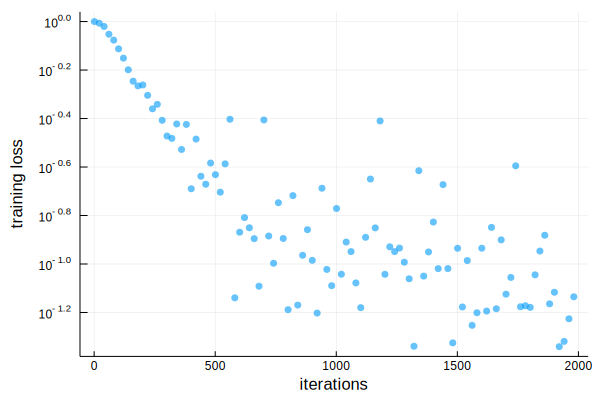

In [59]:
##TODO: Your code for computing Pcorrect over all digits
n = num_digits
d = 784
@show mu = 7e-10
W0 = zeros(n, d) 
b0 = zeros(n)
iters = 2000 
wtanhm, btanhm, loss_tanhm = learn2classify_asgd_1layer(
    tanh, dtanh, grad_loss_1layer,
    xtrain, yvector, W0, b0, mu, iters
)
scatter(
    1:20:iters, loss_linear[1:20:end],
    yscale=:log10,
    xlabel="iterations",
    ylabel="training loss"
)

pcorrect = sum(class_predictions_tanhm .== test_labels) / length(test_labels) = 0.823


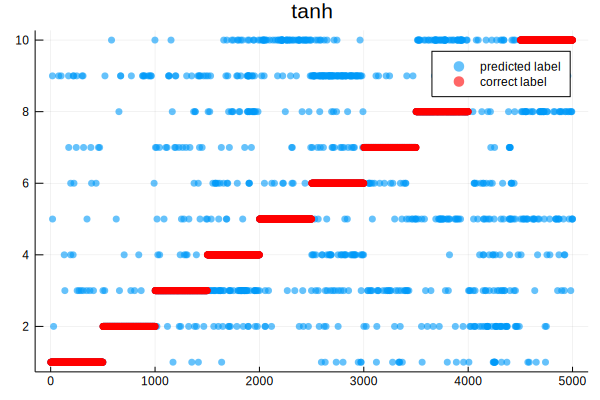

In [60]:
Ytanhm = tanh.(wtanhm * xtest .+ btanhm)
class_predictions_tanhm = vec(mapslices(x -> findmax(x)[2], Ytanhm; dims=1))
@show pcorrect = sum(class_predictions_tanhm .== test_labels) / length(test_labels)
scatter(class_predictions_tanhm; label="predicted label", title="tanh")
scatter!(test_labels; color="red", label="correct label")

# Summary and next steps

Multi-class classification is ubiquitous in data science. We can use what you have implemented to tell apart people from, say, cats and dogs. Or cars from planes and ships, and so on. The simple method discussed here that uses a single hidden layer can be improved upon by using "deep" networks where there are multiple hidden layers between the input and output neurons. What changes in deep networks is the equation relating the input to the output. These equations become more complicated, involving as many "dot" operators as there are hidden layers, and many times more parameters to learn as well. So training deep networks takes longer and is more brittle in ways we shall discuss. Regardless of the number of hidden layers, the same principle we learned here can be used to encode the class label vectors -- remember, this form of encoding is often referred to as **one-hot-encoding**. Other loss functions can also be used.

To summarize: we discussed how to train a neural network with a single hidden layer using stochastic gradient descent. We saw how neural networks with non-linear activation functions can efficiently separate classes that are not linearly separable. 

Next, we will discuss deep networks where there are multiple hidden layers. The computation of the gradients emerges as a painstaking effort. Back-propagation emerges as a vital technique for overcoming this bottleneck. Software packages such as `ForwardDiff` and `ReverseDiff` compute gradients in a way that is quite magical, broadening the range of classification and inference tasks we can accomplish.

# Additional Exercises

## Accuracy versus number of classes

It is interesting to see how the probability of correct classification for this simple method depends on the number of classes. To that end, compute and plot this empirical probability versus the number of digits we are attempting to discriminate. Note that there are $n \choose k$ ways of selecting $k$ digits for this computation. For simplicity, for every k = $2, \ldots, 10$, generate this plot for  discriminating between digits $0, \ldots, k -1$. 

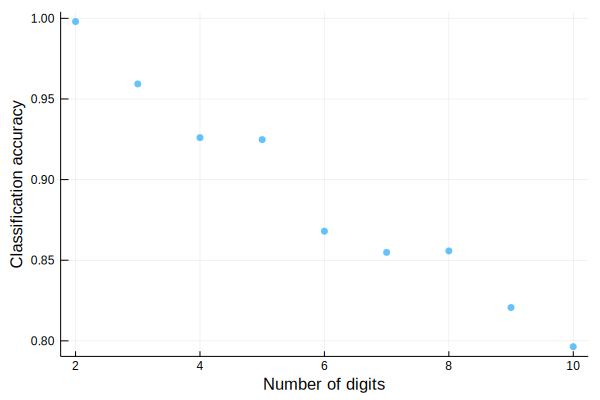

In [61]:
## TODO: plot probability of correct classification vs number of classes
pcorrect_vec = zeros(9)
f_a = linear
df_a = dlinear

for k in 2:10
    data_digits = collect(0:(k - 1))
    num_digits = length(data_digits)
    x = [load_digit_data(d) for d in data_digits]
    # one-hot encoding matrix
    class_encoding_matrix = diagm(0 => ones(num_digits))

    # training input: first half of samples for each digit
    xtrain = hcat((reshape(x[i][:, :, 1:500], 784, :) for i in 1:k)...)
    # desired output for training input
    yvector = hcat((kron(ones(500)',class_encoding_matrix[:,i]) for i in 1:k)...)
    # initialize parameters
    d = size(xtrain, 1)
    mu = 1e-11
    W0 = zeros(num_digits, 784) 
    b0 = zeros(num_digits)
    iters = 2000
    
    # train the network
    W, b, loss = learn2classify_asgd_1layer(
    f_a, df_a, grad_loss_1layer,
    xtrain, yvector, W0, b0, mu, iters
)

    # testing input (second half of samples) and correct labels
    xtest = hcat((reshape(x[i][:, :, 501:1000], 784, :) for i in 1:k)...)
    test_labels = kron(1:num_digits, ones(500))
    
    # use trained network to classify testing input
    Y = f_a.(W * xtest .+ b)
    class_predictions = vec(mapslices(x -> findmax(x)[2], Y; dims=1)) 

    # compute accuracy
    pcorrect_vec[k - 1] = sum(class_predictions .== test_labels) / length(test_labels)
end

# this is the plot we're after
scatter(2:10, pcorrect_vec; xlabel="Number of digits", ylabel="Classification accuracy")

## Accuracy as a function of the learning rate

We would like to understand how the acuracy depends on the learning rate. Compute the accuracy for `mu = 1e-11`, `mu = 1e-10` and `mu = 1e-9`. Superimpose the three series in the same plot using the `scatter!`

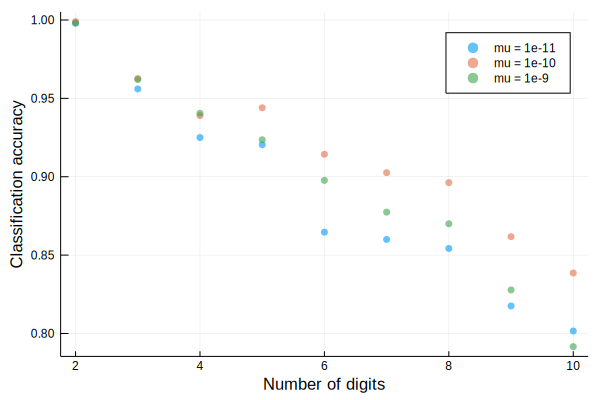

In [62]:
##TODO: Plot here
pcorrect_vec = zeros(9,3)
f_a = linear
df_a = dlinear
mu_vec = [1e-11, 1e-10, 1e-9]
for j in 1:3
for k in 2:10
    data_digits = collect(0:(k - 1))
    num_digits = length(data_digits)
    x = [load_digit_data(d) for d in data_digits]
    # one-hot encoding matrix
    class_encoding_matrix = diagm(0 => ones(num_digits))

    # training input: first half of samples for each digit
    xtrain = hcat((reshape(x[i][:, :, 1:500], 784, :) for i in 1:k)...)
    # desired output for training input
    yvector = hcat((kron(ones(500)',class_encoding_matrix[:,i]) for i in 1:k)...)
    # initialize parameters
    d = size(xtrain, 1)
    mu = mu_vec[j]
    W0 = zeros(num_digits, 784) 
    b0 = zeros(num_digits)
    iters = 2000
    
    # train the network
    W, b, loss = learn2classify_asgd_1layer(
    f_a, df_a, grad_loss_1layer,
    xtrain, yvector, W0, b0, mu, iters
)

    # testing input (second half of samples) and correct labels
    xtest = hcat((reshape(x[i][:, :, 501:1000], 784, :) for i in 1:k)...)
    test_labels = kron(1:num_digits, ones(500))
    
    # use trained network to classify testing input
    Y = f_a.(W * xtest .+ b)
    class_predictions = vec(mapslices(x -> findmax(x)[2], Y; dims=1)) 

    # compute accuracy
    pcorrect_vec[k - 1,j] = sum(class_predictions .== test_labels) / length(test_labels)
end
end

scatter(2:10, pcorrect_vec[:,1]; xlabel="Number of digits", ylabel="Classification accuracy", label="mu = 1e-11")
scatter!(2:10, pcorrect_vec[:,2], label="mu = 1e-10")
scatter!(2:10, pcorrect_vec[:,3], label="mu = 1e-9")

## Confusion matrix

The confusion matrix is 10 $\times$ 10, where the $(i, j)$-th entry is the probability that digit $i-1$ was classified as digit $j-1$.

**Exercise**: 

Vary the step size `mu` below till the network learns. If you get a `no strict ticks` error or a `NaN` for the training loss, it means that your training loss is not finite and you will have to reduce the learning rate till it learns. 

Hint: A good learning rate will ensure that the network attains a low enough loss runs every time. The trick (and art) is to start with a rate, see if it learns and if it does not to keep reducing it till it does.

In [63]:
## TODO: your code here
k = 10
    data_digits = collect(0:(k - 1))
    num_digits = length(data_digits)
    x = [load_digit_data(d) for d in data_digits]
    # one-hot encoding matrix
    class_encoding_matrix = diagm(0 => ones(num_digits))

    # training input: first half of samples for each digit
    xtrain = hcat((reshape(x[i][:, :, 1:500], 784, :) for i in 1:k)...)
    # desired output for training input
    yvector = hcat((kron(ones(500)',class_encoding_matrix[:,i]) for i in 1:k)...)
    # initialize parameters
    d = size(xtrain, 1)
    mu = 1e-11
    W0 = zeros(num_digits, 784) 
    b0 = zeros(num_digits)
    iters = 2000
    
    # train the network
    W, b, loss = learn2classify_asgd_1layer(
    f_a, df_a, grad_loss_1layer,
    xtrain, yvector, W0, b0, mu, iters
)

    # testing input (second half of samples) and correct labels
    xtest = hcat((reshape(x[i][:, :, 501:1000], 784, :) for i in 1:k)...)
    test_labels = kron(1:num_digits, ones(500))
    
    # use trained network to classify testing input
    Y = f_a.(W * xtest .+ b)
    class_predictions = vec(mapslices(x -> findmax(x)[2], Y; dims=1)) 

# begin by re-using code from the previous problem to train a network to
# distinguish all 10 digits.

confusion_matrix = zeros(10, 10)

for i in 1:10
    # what indices correspond to digit i - 1?
    indices_i = 500*(i-1)+1:500*i
    
    # predictions for digit i - 1
    predictions_i = class_predictions[indices_i]
    
    for j in 1:10
        # fraction of digit (i - 1) samples labeled with label j
        confusion_matrix[i, j] = sum(predictions_i .== j) / 500
    end
end

# check to see if each row sums to 1
@show sum(confusion_matrix; dims=2)
confusion_matrix

sum(confusion_matrix; dims=2) = [1.0; 1.0; 1.0; 1.0; 1.0; 1.0; 1.0; 1.0; 1.0; 1.0]


10×10 Array{Float64,2}:
 0.946  0.0    0.002  0.012  0.002  0.0    0.03   0.0    0.008  0.0  
 0.0    0.966  0.004  0.002  0.0    0.004  0.008  0.002  0.012  0.002
 0.01   0.076  0.792  0.022  0.016  0.0    0.034  0.026  0.014  0.01 
 0.012  0.034  0.024  0.84   0.0    0.012  0.018  0.028  0.012  0.02 
 0.0    0.028  0.006  0.0    0.802  0.0    0.028  0.014  0.008  0.114
 0.06   0.058  0.016  0.212  0.026  0.488  0.056  0.016  0.044  0.024
 0.022  0.02   0.028  0.002  0.006  0.006  0.914  0.0    0.002  0.0  
 0.018  0.036  0.01   0.0    0.012  0.0    0.0    0.872  0.006  0.046
 0.026  0.128  0.016  0.098  0.018  0.008  0.04   0.012  0.618  0.036
 0.02   0.02   0.016  0.026  0.05   0.004  0.002  0.07   0.004  0.788

**Claim**: The rows of the confusion matrix sum to $1$.


(Optional): Explain (mathematically) why.

prob of 1 recognised as 1 + prob of 1 recognised as 2 + ------ + prob of 1 recognised as 10 = 1, because all the 1's need to be predicted as some number, so the rows add up to 1

## Understanding why the algorithm can fail

In the function `predict_digit`, the output of the hidden layer is a vector with dimension equal to the number of classes. The index of the largest element of that vector is the network's prediction for the class label, according to our decision rule. The pertinent lines of code are:

```julia
    hiddenlayer_output = f_a.(w * my_img_vector + b)
    class_prediction = mapslices(indmax,hiddenlayer_output, 1)
    my_digit_prediction = class2digit[class_prediction[]]
```

The elements of `hiddenlayer_output` provide insight on settings where the algorithm mis-classifies a digit, as we shall explore next.

First we train a network with a `tanh` activation function to distinguish between a "3", "7"  and "8".

In [64]:
##TODO: Code here to train network -- plot learning curve 

f_a = tanh
df_a = dtanh

data_digits = [3, 7, 8]
num_digits = length(data_digits)
class_label_vector = collect(1:num_digits)

x = [load_digit_data(d) for d in data_digits]

# one-hot encoding matrix
class_encoding_matrix = diagm(0 => ones(num_digits))

# training input: first half of samples for each digit
xtrain = hcat((reshape(xi[:, :, 1:500], 784, :) for xi in x)...)

# desired output for training input
yvector = hcat((kron(ones(500)', class_encoding_matrix[:, i]) for i in 1:num_digits)...)

# initialize parameters
d = 784
mu = 1e-11
W0 = zeros(num_digits, d) 
b0 = zeros(num_digits)
iters = 2000

# train the network
W, b, loss = learn2classify_asgd_1layer(
    f_a, df_a, grad_loss_1layer,
    xtrain, yvector, W0, b0, mu, iters
)

digit2class = Dict(string(data_digits[i]) => class_label_vector[i] for i in 1:num_digits )
class2digit = Dict(value => key for (key,value) in digit2class)

Dict{Int64,String} with 3 entries:
  2 => "7"
  3 => "8"
  1 => "3"

Then we launch the app and draw the  digit "3" in such a way that it  is **correctly classified** by the algorithm. 

In [65]:
app = Canvas()

Canvas(Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :canvas), Any[], Dict{Symbol,Any}(:style=>Dict("display"=>"block","border"=>"1px solid #ccc"),:height=>250,:width=>250)), Node{DOM}(DOM(:html, :button), Any["Clear"], Dict{Symbol,Any}(:events=>Dict("click"=>JSString("function() {\n    const canvas = _webIOScope.dom.querySelector(\"canvas\");\n    canvas.clear();\n    _webIOScope.setObservableValue(\"data\", \"\");\n}\n"))))], Dict{Symbol,Any}(:style=>Dict("align-items"=>"center","display"=>"flex","flex-direction"=>"column","justify-content"=>"space-evenly"))), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("image"=>(Observable{Any} with 0 listeners. Value:
nothing, false),"data"=>(Observable{String} with 1 listeners. Value:
"", nothing)), Set(String[]), nothing, Asset[], Dict{Any,Any}(), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Condition(Any[Task (runnable) @0x00007ffab9098760])), WebIO.JSString[JSString("function() {\n    const canvas = this.dom.querySelector(\"canvas\");\n    let path = [];\n    \n    canvas.clear = function () {\n        path = [];\n        redraw();\n    }\n\n    const context = canvas.getContext(\"2d\");\n    context.lineWidth = 20;\n    context.strokeStyle = 'black';\n    context.lineJoin = \"round\";\n\n    let lastPoint = [0, 0];\n    let isDrawing = false;\n\n    function currentPoint(e) {\n        const rect = canvas.getBoundingClientRect();\n        return [e.clientX - rect.left, e.clientY - rect.top];\n    }\n\n    function redraw() {\n        console.log(\"redraw\", path);\n        canvas.getContext(\"2d\").clearRect(0, 0, canvas.width, canvas.height);\n        let last = null;\n        for (const point of [...path, null]) {\n            if (last === null) {\n                context.moveTo(...point);\n                context.beginPath();\n            }\n            if (point === null) {\n                context.stroke();\n                context.closePath();\n            } else {\n                context.lineTo(...point);\n            }\n            last = point;\n        }\n    }\n\n    function drawLine(begin, end) {\n        context.beginPath();\n        context.moveTo(...begin);\n        context.lineTo(...end);\n        context.stroke();\n        context.lineWidth = 20;\n        context.lineJoin = \"round\";\n        context.strokeStyle = 'black';\n        context.closePath();\n    }\n\n    canvas.addEventListener(\"mousemove\", (event) => {\n        const point = currentPoint(event);\n        if (isDrawing) {\n            path.push(point);\n            redraw();\n        }\n        lastPoint = point;\n    });\n\n    canvas.addEventListener(\"mousedown\", (event) => {\n        lastPoint = currentPoint(event);\n        isDrawing = true;\n    });\n\n    // Note: we do window here to handle when the mouseup happens outside of the\n    // canvas element\n    window.addEventListener(\"mouseup\", (event) => {\n        if (!isDrawing) {\n            return;\n        }\n        drawLine(lastPoint, currentPoint(event));\n        this.setObservableValue(\"data\", canvas.toDataURL())\n        isDrawing = false;\n        path.push(null);\n    });\n}\n")]))

In [66]:
my_img, my_digit_prediction, hiddenlayer_output = predict_digit(app, class2digit, tanh, W, b)

p1 = heatmap_digit(my_img; title="Network predicts $my_digit_prediction")
xticks = parse.(Int64, [class2digit[i] for i in 1:length(keys(class2digit))])
x = 1:length(hiddenlayer_output)

p2 = bar(
    x,
    hiddenlayer_output; 
    xlabel="Class label",
    ylabel="Hidden layer output",
    xticks=(x, xticks)
)
plot(p1, p2; layout=(1, 2), size=(800, 400))

MethodError: MethodError: no method matching imresize(::Nothing, ::Tuple{Int64,Int64})
Closest candidates are:
  imresize(!Matched::AbstractArray{T,N}, ::Tuple{Vararg{Int64,N}}) where {T, N} at /home/nbuser/.julia/packages/ImageTransformations/7wC0C/src/resizing.jl:221
  imresize(!Matched::AbstractArray, ::Union{Tuple{Vararg{AbstractUnitRange,M}}, Tuple{Vararg{Int64,M}}}) where M at /home/nbuser/.julia/packages/ImageTransformations/7wC0C/src/resizing.jl:179

Then we re-launch the app and draw the  digit "3" in such a way that it  is **incorrectly classified** by the algorithm. 

In [67]:
app

Canvas(Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :canvas), Any[], Dict{Symbol,Any}(:style=>Dict("display"=>"block","border"=>"1px solid #ccc"),:height=>250,:width=>250)), Node{DOM}(DOM(:html, :button), Any["Clear"], Dict{Symbol,Any}(:events=>Dict("click"=>JSString("function() {\n    const canvas = _webIOScope.dom.querySelector(\"canvas\");\n    canvas.clear();\n    _webIOScope.setObservableValue(\"data\", \"\");\n}\n"))))], Dict{Symbol,Any}(:style=>Dict("align-items"=>"center","display"=>"flex","flex-direction"=>"column","justify-content"=>"space-evenly"))), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("image"=>(Observable{Any} with 0 listeners. Value:
nothing, false),"data"=>(Observable{String} with 1 listeners. Value:
"", nothing)), Set(String[]), nothing, Asset[], Dict{Any,Any}(), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Condition(Any[Task (runnable) @0x00007ffab9098760])), WebIO.JSString[JSString("function() {\n    const canvas = this.dom.querySelector(\"canvas\");\n    let path = [];\n    \n    canvas.clear = function () {\n        path = [];\n        redraw();\n    }\n\n    const context = canvas.getContext(\"2d\");\n    context.lineWidth = 20;\n    context.strokeStyle = 'black';\n    context.lineJoin = \"round\";\n\n    let lastPoint = [0, 0];\n    let isDrawing = false;\n\n    function currentPoint(e) {\n        const rect = canvas.getBoundingClientRect();\n        return [e.clientX - rect.left, e.clientY - rect.top];\n    }\n\n    function redraw() {\n        console.log(\"redraw\", path);\n        canvas.getContext(\"2d\").clearRect(0, 0, canvas.width, canvas.height);\n        let last = null;\n        for (const point of [...path, null]) {\n            if (last === null) {\n                context.moveTo(...point);\n                context.beginPath();\n            }\n            if (point === null) {\n                context.stroke();\n                context.closePath();\n            } else {\n                context.lineTo(...point);\n            }\n            last = point;\n        }\n    }\n\n    function drawLine(begin, end) {\n        context.beginPath();\n        context.moveTo(...begin);\n        context.lineTo(...end);\n        context.stroke();\n        context.lineWidth = 20;\n        context.lineJoin = \"round\";\n        context.strokeStyle = 'black';\n        context.closePath();\n    }\n\n    canvas.addEventListener(\"mousemove\", (event) => {\n        const point = currentPoint(event);\n        if (isDrawing) {\n            path.push(point);\n            redraw();\n        }\n        lastPoint = point;\n    });\n\n    canvas.addEventListener(\"mousedown\", (event) => {\n        lastPoint = currentPoint(event);\n        isDrawing = true;\n    });\n\n    // Note: we do window here to handle when the mouseup happens outside of the\n    // canvas element\n    window.addEventListener(\"mouseup\", (event) => {\n        if (!isDrawing) {\n            return;\n        }\n        drawLine(lastPoint, currentPoint(event));\n        this.setObservableValue(\"data\", canvas.toDataURL())\n        isDrawing = false;\n        path.push(null);\n    });\n}\n")]))

In [68]:
my_img, my_digit_prediction, hiddenlayer_output = predict_digit(app, class2digit, tanh, wtanh, btanh)

p1 = heatmap_digit(my_img; title="Network predicts $my_digit_prediction")
xticks = parse.(Int64, [class2digit[i] for i in 1:length(keys(class2digit))])
x = 1:length(hiddenlayer_output)

p2 = bar(
    x,
    hiddenlayer_output; 
    xlabel="Class label",
    ylabel="Hidden layer output",
    xticks=(x, xticks)
)
plot(p1, p2; layout=(1, 2), size=(800, 400))

MethodError: MethodError: no method matching imresize(::Nothing, ::Tuple{Int64,Int64})
Closest candidates are:
  imresize(!Matched::AbstractArray{T,N}, ::Tuple{Vararg{Int64,N}}) where {T, N} at /home/nbuser/.julia/packages/ImageTransformations/7wC0C/src/resizing.jl:221
  imresize(!Matched::AbstractArray, ::Union{Tuple{Vararg{AbstractUnitRange,M}}, Tuple{Vararg{Int64,M}}}) where M at /home/nbuser/.julia/packages/ImageTransformations/7wC0C/src/resizing.jl:179

**Exercise**: 

Compare the output of the network for the case where the "3" is correctly vs incorrectly classified. What insights does the vector provide?

The first element of the vector is largest when the network predicts correctly and the second element is largest when it is wrongly classified

## Equivalent formulation of nearest vector (in least squares sense)

Consider a vector $y \in \mathbb{R}^k$ and the following decision rule: we return the class $j$ such that 
$$j = \arg\min_{i} \left\|e_i - y\right\|_2^2.$$


That is, if $y$ is closer to the vector $e_j$ than any other $e_i$ for $i \neq j$, we return the label $j$. Here, $e_i$ is the $k$-dimensional vector with a $1$ in the $i^{th}$ position and $0$ elsewhere. Show that this decision rule is equivalent to returning the label 

$$j = \arg\max_{i} y_i,$$

where we are maximizing over *coordinates* of $y$. This is why we used the decision rule that we did.

Hint: Expand the norm in terms of inner products.

$||e_i-y||_2^2 = (e_i-y).(e_i-y) = e_i.e_i-2e_i.y+y.y$. The norm is $1-2y_{i}+|y|^2$ since all elements except the "i"th element of $e_i$ are 0. If we want to minimize $1-2y_i+|y|^2$ we need to choose i such that $y_i$ is the largest element of y which is same as $𝑗=arg(max 𝑦_i)$

## Fitting a function

Use the learning algorithm implemented in this codex to fit the function 

$$ f(x) = \log x + x^{1/3}, $$

for $x\in [1/2, 2]$. Use $n=$ 2, 4, 8, 16, 32, and 64. Use a value of $\mu$ that leads to convergence ("learning"), and generate results from 1000, 2000, and 4000 iterations. Generate a plot with three curves (one for each number of iterations), where each curve illustrates loss versus n. Generate this plot for both `tanh` and `linear` activation functions, and compare.

In [69]:
## TODO: your code here

# we are varying several things in this problem: n, activation
# function, iters, and maybe mu and even batch size.
# A good strategy is to write a function that will return the
# final loss for one particular choice of these parameters.

function fcn_fit_loss(
        fcn::Function, 
        x::Matrix, 
        f_a::Function,
        df_a::Function, 
        iters::Integer,
        n::Integer; 
        mu::Float64=1e-5,
        batch_size::Integer=20
    )

    # desired output
    y = fcn(x)

    d = 1
    W0  = zeros(n, d)
    b0 = zeros(n)

    w_hat, b_hat, loss = learn2classify_asgd_1layer(
        f_a, df_a, grad_loss_1layer_1output,
        x, y, W0, b0, mu, iters, batch_size
    )
    return loss[end]
end

fcn_fit_loss (generic function with 1 method)

In [ ]:
# the function you defined above reduces the rest of the problem
# to book-keeping.

# the function we are trying to fit
f(x) = log.(x)+x.^(1/3)

# the number of samples
N = 200
x = Matrix(range(0.5; stop=2, length=N)')

# the vector of values for n
n_vals = [2, 4, 8, 16, 32, 64]

# initialize each vector we want to fill in
linear_1000 = zeros(length(n_vals))
linear_2000 = zeros(length(n_vals))
linear_4000 = zeros(length(n_vals))

tanh_1000 = zeros(length(n_vals))
tanh_2000 = zeros(length(n_vals))
tanh_4000 = zeros(length(n_vals))

for i in 1:length(n_vals)
    n = n_vals[i]
    
    linear_1000[i] = fcn_fit_loss(f, x, linear, dlinear, 1000, n)
    linear_2000[i] = fcn_fit_loss(f, x, linear, dlinear, 2000, n)
    linear_4000[i] = fcn_fit_loss(f, x, linear, dlinear, 4000, n)
    tanh_1000[i] = fcn_fit_loss(f, x, tanh, dtanh, 1000, n)
    tanh_2000[i] = fcn_fit_loss(f, x, tanh, dtanh, 2000, n)
    tanh_4000[i] = fcn_fit_loss(f, x, tanh, dtanh, 4000, n)
    
    # continue in this manner...
end

In [ ]:
# okay, now it's time to plot

p1 = plot(
    linear_1000;
    title="linear",
    label="1000 iters",
    yscale=:log10,
    xlabel="n",
    ylabel="MSE",
    color="blue"
)
plot!(linear_2000; label="2000 iters", color="red")
plot!(linear_4000; label="4000 iters", color="orange")

p2 = plot(
    tanh_1000; 
    title="tanh",
    label="1000 iters",
    yscale=:log10,
    xlabel="n",
    ylabel="MSE",
    color="blue"
)
plot!(tanh_2000; label="2000 iters", color="red")
plot!(tanh_4000; label="4000 iters", color="orange")

plot(p1, p2; layout=(2, 1))